# Load Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generating Dataset

In [18]:
personal_traits_bad = ['aggressive','impatience','secretive','passionate','gullible','immoral']
personal_traits_good = ['kind','honest','polite','generous',]
technical_knowledge = ["none","little","neutral","good","extreme"]
social_characteristics = ['social','anti-social','omnivert']
motivating_factors = ['monetary_gain','thrill_seeking','emotions','revenge','hurt','insecure']
non_motivating_factors = ['mature','fear','high self-esteem','status','intelligent']

In [20]:
import csv 
import random 

In [25]:
def trait(c):
    if c==0:
        return [random.choice(personal_traits_bad),random.choice(personal_traits_bad),random.choice(personal_traits_bad)]
    else:
        return [random.choice(personal_traits_good),random.choice(personal_traits_good),random.choice(personal_traits_good)]

In [38]:
print(trait(1))

['polite', 'honest', 'kind']


In [28]:
def factor(c):
    if c==0:
        return [random.choice(motivating_factors),random.choice(motivating_factors),random.choice(motivating_factors)]
    else:
        return [random.choice(non_motivating_factors),random.choice(non_motivating_factors),random.choice(non_motivating_factors)]

In [60]:
with open('cyber_criminal_dataset.csv', 'w', newline ='') as f:  
    file = csv.writer(f) 
    file.writerow(['technical_knowledge', 'personal_traits', 'social_characteristics', 'motivating_factors']) 
                   
    for i in range (1, 5000) :
        c = random.randint(0,1) 
        file.writerow([random.choice(technical_knowledge),random.choice(trait(c)),random.choice(social_characteristics),random.choice(factor(c))])

# Load the dataset

In [61]:
dataset = pd.read_csv('cyber_criminal_dataset.csv')

In [62]:
dataset.head()

,technical_knowledge,personal_traits,social_characteristics,motivating_factors
0,little,immoral,anti-social,revenge
1,none,polite,social,status
2,none,kind,anti-social,mature
3,extreme,kind,social,intelligent
4,none,honest,social,mature


In [63]:
dataset.dtypes

technical_knowledge       object
personal_traits           object
social_characteristics    object
motivating_factors        object
dtype: object

In [64]:
dataset.shape

(4999, 4)

In [68]:
for c in dataset.columns:
    print(dataset[c].unique())
    print()

['little' 'none' 'extreme' 'good' 'neutral']

['immoral' 'polite' 'kind' 'honest' 'aggressive' 'generous' 'passionate'
 'secretive' 'gullible' 'impatience']

['anti-social' 'social' 'omnivert']

['revenge' 'status' 'mature' 'intelligent' 'thrill_seeking'
 'high self-esteem' 'monetary_gain' 'fear' 'insecure' 'hurt' 'emotions']



# Mapping the categorical data

In [69]:
mapped_data = dataset.copy() 

In [70]:
mapped_data['technical_knowledge'] = mapped_data['technical_knowledge'].map({'none':1,'little':2,'neutral':3,'good':4,'extreme':5})

In [71]:
mapped_data.head()

,technical_knowledge,personal_traits,social_characteristics,motivating_factors
0,2,immoral,anti-social,revenge
1,1,polite,social,status
2,1,kind,anti-social,mature
3,5,kind,social,intelligent
4,1,honest,social,mature


In [72]:
mapped_data['social_characteristics'] = mapped_data['social_characteristics'].map({'social':2,'omnivert':1,'anti-social':0})

In [73]:
mapped_data.head()

,technical_knowledge,personal_traits,social_characteristics,motivating_factors
0,2,immoral,0,revenge
1,1,polite,2,status
2,1,kind,0,mature
3,5,kind,2,intelligent
4,1,honest,2,mature


In [77]:
for c in mapped_data.columns:
    print(mapped_data[c].unique())
    print()

[2 1 5 4 3]

['immoral' 'polite' 'kind' 'honest' 'aggressive' 'generous' 'passionate'
 'secretive' 'gullible' 'impatience']

[0 2 1]

['revenge' 'status' 'mature' 'intelligent' 'thrill_seeking'
 'high self-esteem' 'monetary_gain' 'fear' 'insecure' 'hurt' 'emotions']



In [78]:
final_data = pd.get_dummies(mapped_data, prefix=['pt', 'mf'])

In [79]:
final_data

,technical_knowledge,social_characteristics,pt_aggressive,pt_generous,pt_gullible,pt_honest,pt_immoral,pt_impatience,pt_kind,pt_passionate,...,mf_fear,mf_high self-esteem,mf_hurt,mf_insecure,mf_intelligent,mf_mature,mf_monetary_gain,mf_revenge,mf_status,mf_thrill_seeking
0,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,5,2,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4995,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4996,5,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4997,4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Clustering initially with 2 clusters

In [86]:
from sklearn.cluster import KMeans

In [87]:
kmeans = KMeans(2)

In [88]:
x = final_data.copy()

In [89]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [90]:
clusters = kmeans.fit_predict(x)

In [92]:
x['cluster'] = clusters

In [93]:
x.head()

,technical_knowledge,social_characteristics,pt_aggressive,pt_generous,pt_gullible,pt_honest,pt_immoral,pt_impatience,pt_kind,pt_passionate,...,mf_high self-esteem,mf_hurt,mf_insecure,mf_intelligent,mf_mature,mf_monetary_gain,mf_revenge,mf_status,mf_thrill_seeking,cluster
0,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,5,2,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


# Finding the appropriate number of clusters

In [94]:
d = final_data.copy()
wcss = []
for i in range(1,10):
    kmeans =KMeans(i)
    kmeans.fit(d)
    wcss.append(kmeans.inertia_)
wcss

[22775.296259251714,
 14875.914537948142,
 13350.365629775037,
 12122.265806895344,
 11350.111193398745,
 10761.792167900634,
 10436.749603106204,
 10161.583156234703,
 10002.450808595173]

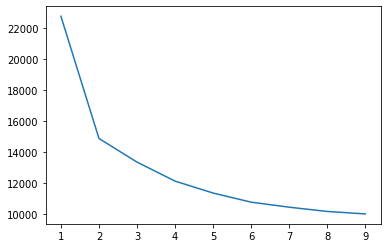

In [95]:
plt.plot(range(1,10),wcss)

#### 2 clusters seem fine. 

# With the cluster info we can build a Classifier that classifies the profile.

In [98]:
new_dataset = x.copy()

In [99]:
new_dataset.head()

,technical_knowledge,social_characteristics,pt_aggressive,pt_generous,pt_gullible,pt_honest,pt_immoral,pt_impatience,pt_kind,pt_passionate,...,mf_high self-esteem,mf_hurt,mf_insecure,mf_intelligent,mf_mature,mf_monetary_gain,mf_revenge,mf_status,mf_thrill_seeking,cluster
0,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,5,2,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
lr = LogisticRegression()

In [141]:
X = new_dataset.iloc[:,:-1]

In [142]:
X

,technical_knowledge,social_characteristics,pt_aggressive,pt_generous,pt_gullible,pt_honest,pt_immoral,pt_impatience,pt_kind,pt_passionate,...,mf_fear,mf_high self-esteem,mf_hurt,mf_insecure,mf_intelligent,mf_mature,mf_monetary_gain,mf_revenge,mf_status,mf_thrill_seeking
0,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,5,2,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4995,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4996,5,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4997,4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [143]:
y = new_dataset.iloc[:,-1]

In [144]:
y

0       1
1       1
2       1
3       0
4       1
       ..
4994    1
4995    0
4996    0
4997    0
4998    0
Name: cluster, Length: 4999, dtype: int32

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [147]:
lr.fit(X_train,y_train)

LogisticRegression()

In [148]:
predicted = lr.predict(X_test)

In [150]:
predicted

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [157]:
y_test[:]

4108    0
2010    0
3510    0
4502    1
1949    0
       ..
2367    0
4608    1
2160    1
2552    0
2349    0
Name: cluster, Length: 1500, dtype: int32

In [158]:
score = lr.score(X_test,y_test)

In [159]:
score

1.0